### 0.0 Requirements

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [304]:
weather_data = pd.read_csv(r'advanced_weather_air_quality.csv')

In [305]:
weather_data.head(5)

,timestamp,city,temperature_C,humidity_%,air_quality_index,weather_condition
0,2023-01-01 00:00:00,Johannesburg,24.5,82,101,Sunny
1,2023-01-01 00:00:00,Cape Town,21.3,60,132,Sunny
2,2023-01-01 00:00:00,Durban,17.4,50,117,Rainy
3,2023-01-01 00:00:00,Pretoria,21.4,75,133,Cloudy
4,2023-01-01 00:00:00,Bloemfontein,19.1,60,87,Cloudy


### 1. Exploring the Dataset:
Use Python to look at the hourly data for temperature, humidity, air quality (AQI), and weather conditions.


In [306]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          3605 non-null   object 
 1   city               3605 non-null   object 
 2   temperature_C      3605 non-null   float64
 3   humidity_%         3605 non-null   int64  
 4   air_quality_index  3605 non-null   int64  
 5   weather_condition  3605 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 169.1+ KB


In [307]:
weather_data.describe()

,temperature_C,humidity_%,air_quality_index
count,3605.000000,3605.000000,3605.000000
mean,21.954258,64.139806,104.500416
std,5.004633,14.382533,43.216678
min,7.000000,40.000000,30.000000
25%,18.500000,52.000000,67.000000
50%,21.900000,64.000000,105.000000
75%,25.400000,77.000000,142.000000
max,37.500000,89.000000,179.000000


### 2. Cleaning the Data:
Make sure dates are in the right format and there are no missing values.


In [308]:
weather_data.duplicated().sum()

0

In [309]:
round(weather_data.isnull().sum()/len(weather_data)*100, 2)

timestamp            0.0
city                 0.0
temperature_C        0.0
humidity_%           0.0
air_quality_index    0.0
weather_condition    0.0
dtype: float64

In [310]:
weather_data[['date', 'time']] = weather_data['timestamp'].str.split(' ', expand=True)

In [311]:
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])
weather_data['date'] = pd.to_datetime(weather_data['date'])


In [312]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          3605 non-null   datetime64[ns]
 1   city               3605 non-null   object        
 2   temperature_C      3605 non-null   float64       
 3   humidity_%         3605 non-null   int64         
 4   air_quality_index  3605 non-null   int64         
 5   weather_condition  3605 non-null   object        
 6   date               3605 non-null   datetime64[ns]
 7   time               3605 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 225.4+ KB


### 3. Analyzing the Data:









#### a. Find which city had the cleanest and most polluted air.


In [313]:
min_value = weather_data['air_quality_index'].min()
cleanest_city =weather_data.loc[weather_data['air_quality_index'] == min_value, 'city'].iloc[0]

max_value = weather_data['air_quality_index'].max()
polluted_city = weather_data.loc[weather_data['air_quality_index'] == max_value, 'city'].iloc[0]



print(f'The city with the cleanest air is {cleanest_city} with an air quality index of {min_value}')
print(f'The city with the most air pollution is {polluted_city} with an air quality index of {max_value}')

The city with the cleanest air is Bloemfontein with an air quality index of 30
The city with the most air pollution is Cape Town with an air quality index of 179


#### b. See if bad weather (like fog or storms) usually comes with high AQI.


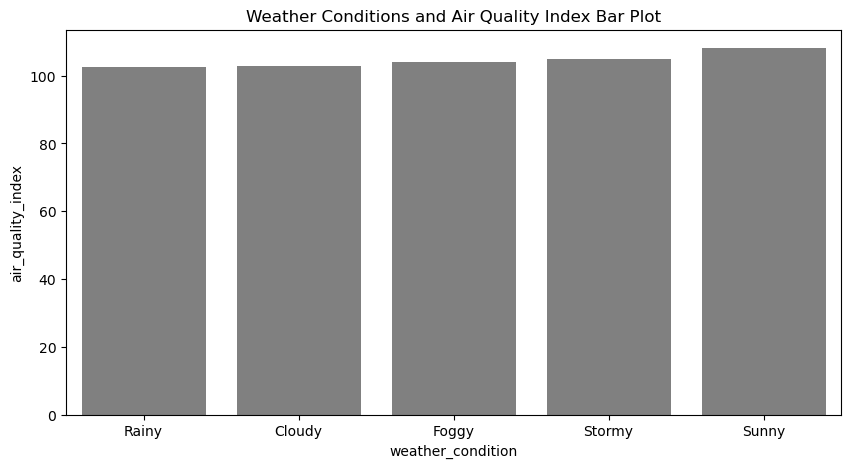

We can observe that bad weather like fog and storms don't necessarily come with high air quality index as the values are around the same level across all the weather conditions


In [314]:
weather_vs_air_quality = weather_data.groupby('weather_condition')['air_quality_index'].mean().sort_values()


plt.figure(figsize= (10, 5))
sns.barplot(weather_vs_air_quality, color = 'grey')
plt.title('Weather Conditions and Air Quality Index Bar Plot')
plt.show()


print("We can observe that bad weather like fog and storms don't necessarily come with high air quality index as the values are around the same level across all the weather conditions")

#### c and d. Compare temperature and humidity with air quality.


In [315]:
weather_data['city'].unique()

array(['Johannesburg', 'Cape Town', 'Durban', 'Pretoria', 'Bloemfontein'],
      dtype=object)

In [316]:
city_data = weather_data.groupby('city')[['temperature_C', 'humidity_%', 'air_quality_index']].mean()
city_data

,temperature_C,humidity_%,air_quality_index
city,,,
Bloemfontein,22.054230,64.020804,104.220527
Cape Town,21.894175,65.617198,102.869626
Durban,22.072677,63.285714,105.156727
Johannesburg,21.932455,63.567268,104.778086
Pretoria,21.817753,64.208044,105.477115


In [317]:
city_data.corr()

,temperature_C,humidity_%,air_quality_index
temperature_C,1.000000,-0.508982,0.018833
humidity_%,-0.508982,1.000000,-0.818751
air_quality_index,0.018833,-0.818751,1.000000


<Axes: >

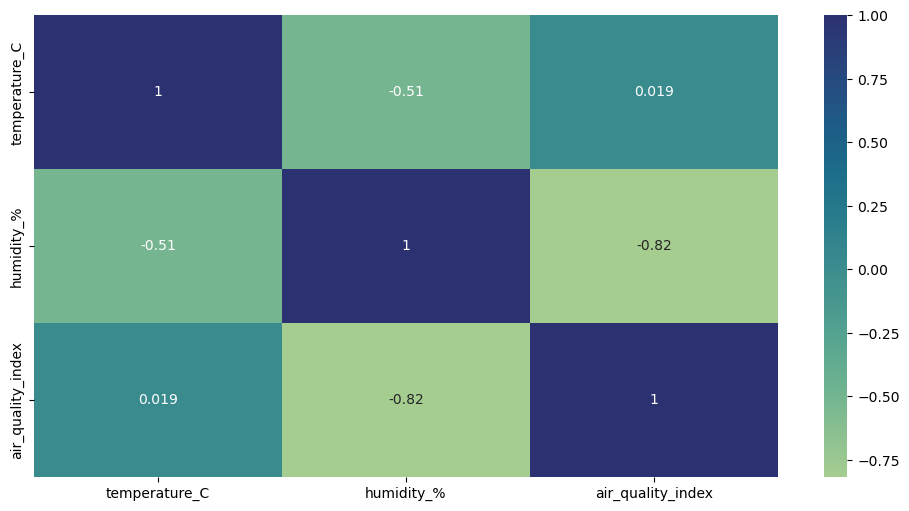

In [318]:
plt.figure(figsize=(12, 6))  
sns.heatmap(city_data.corr(), annot=True, cmap='crest')

#### e. Draw line graphs for AQI changes per city.


In [319]:
weather_data['date'].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00', '2023-01-26 00:00:00', '2023-01-27 00:00:00',
 '2023-01-28 00:00:00', '2023-01-29 00:00:00', '2023-01-30 00:00:00',
 '2023-01-31 00:00:00']
Length: 31, dtype: datetime64[ns]

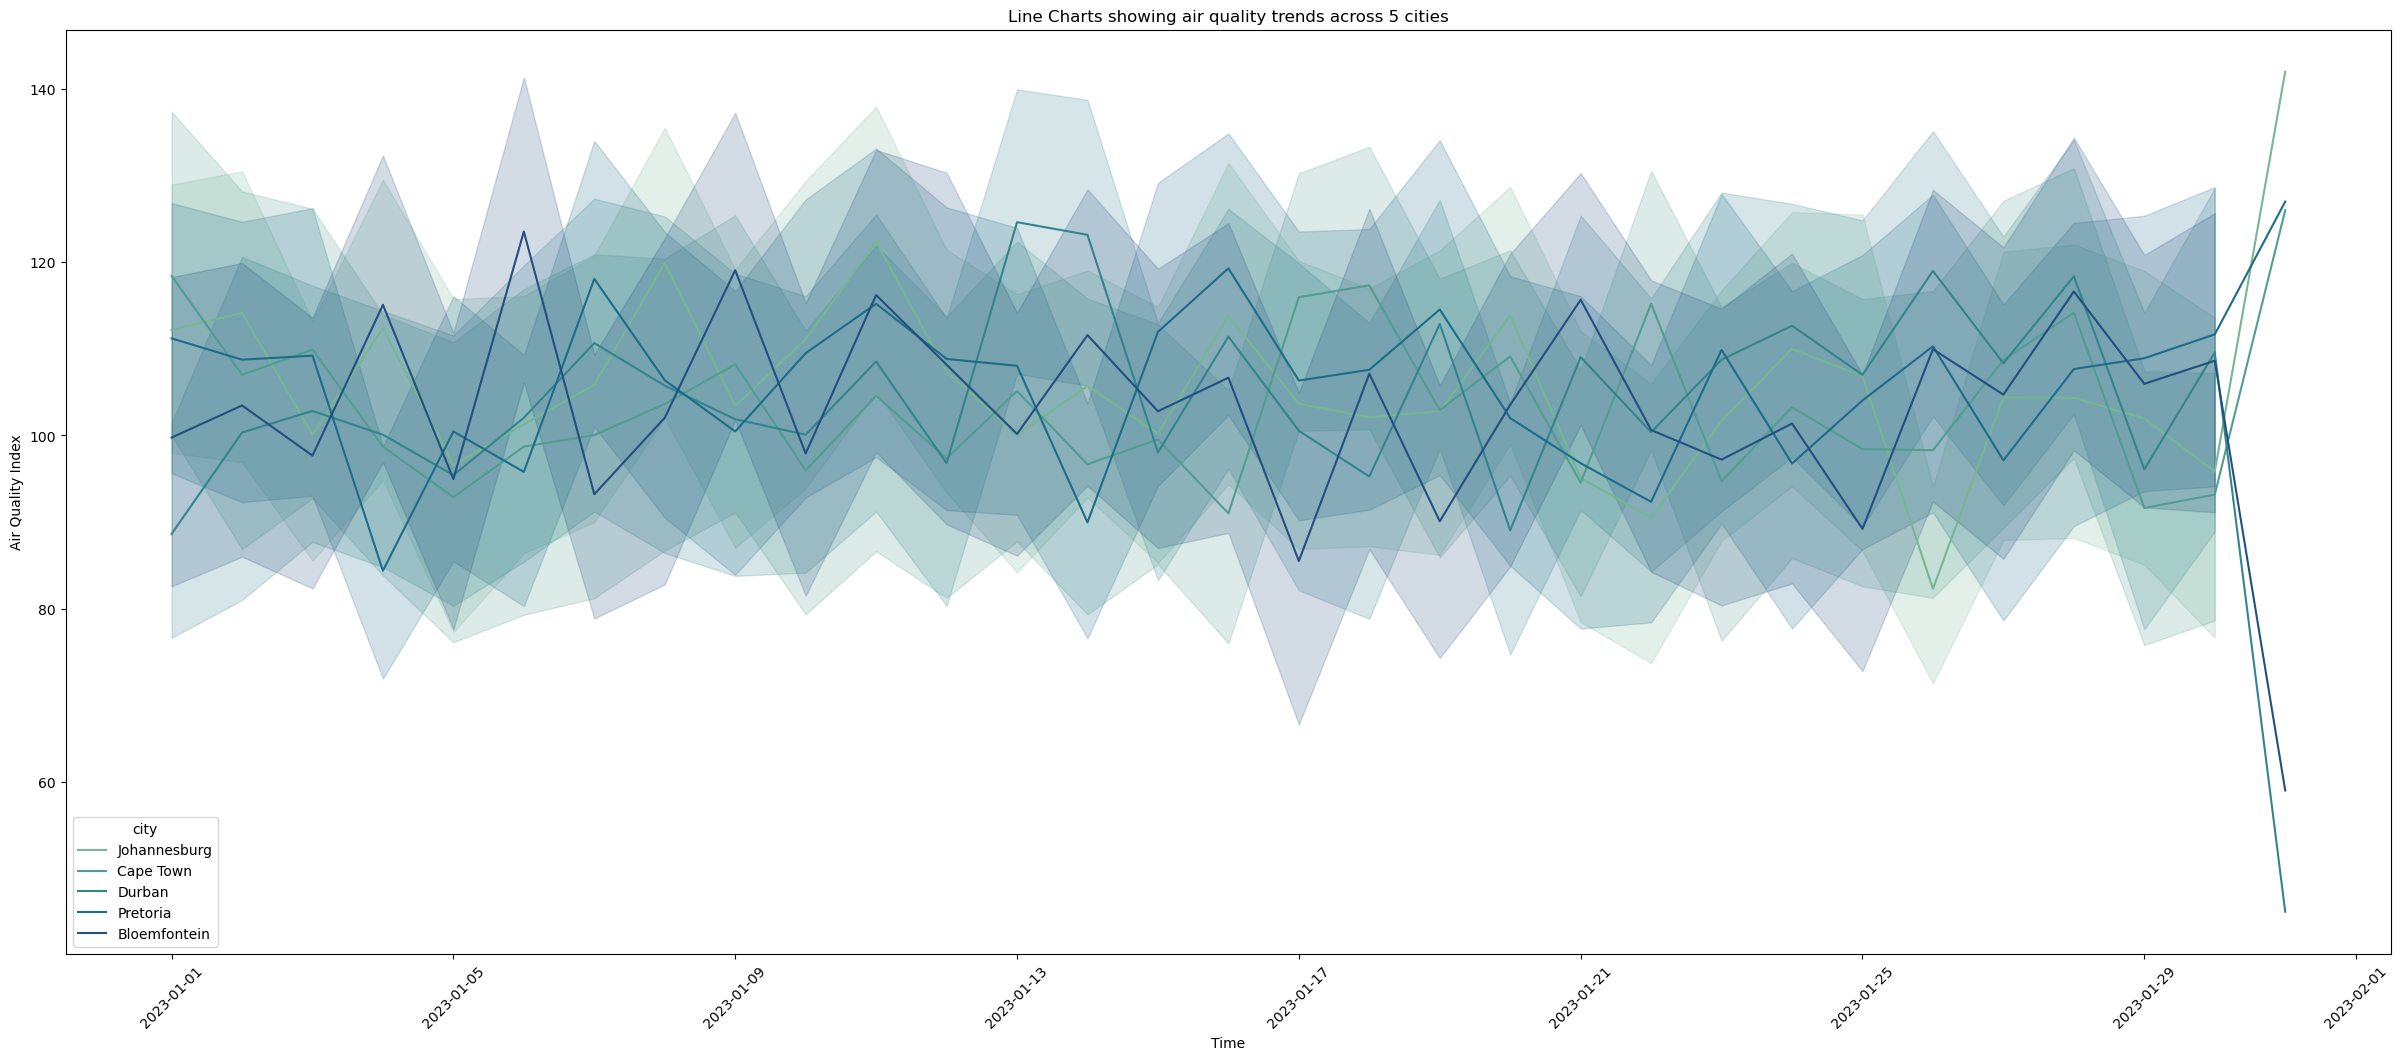

In [320]:
plt.figure(figsize= (30, 12))
sns.lineplot(x = 'date', y = 'air_quality_index', data=weather_data, hue = 'city', palette='crest')
plt.title('Line Charts showing air quality trends across 5 cities')
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Air Quality Index')
plt.show()

#### f. Use bar charts or heatmaps to show patterns.


In [321]:
hourly_data = weather_data.groupby(['time', 'city'])['air_quality_index'].mean()


In [322]:
hourly_data = pd.DataFrame(hourly_data, columns= ['air_quality_index'])
hourly_data.reset_index()

,time,city,air_quality_index
0,00:00:00,Bloemfontein,100.290323
1,00:00:00,Cape Town,106.225806
2,00:00:00,Durban,103.967742
3,00:00:00,Johannesburg,95.483871
4,00:00:00,Pretoria,107.193548
...,...,...,...
115,23:00:00,Bloemfontein,106.566667
116,23:00:00,Cape Town,119.800000
117,23:00:00,Durban,98.566667
118,23:00:00,Johannesburg,116.833333


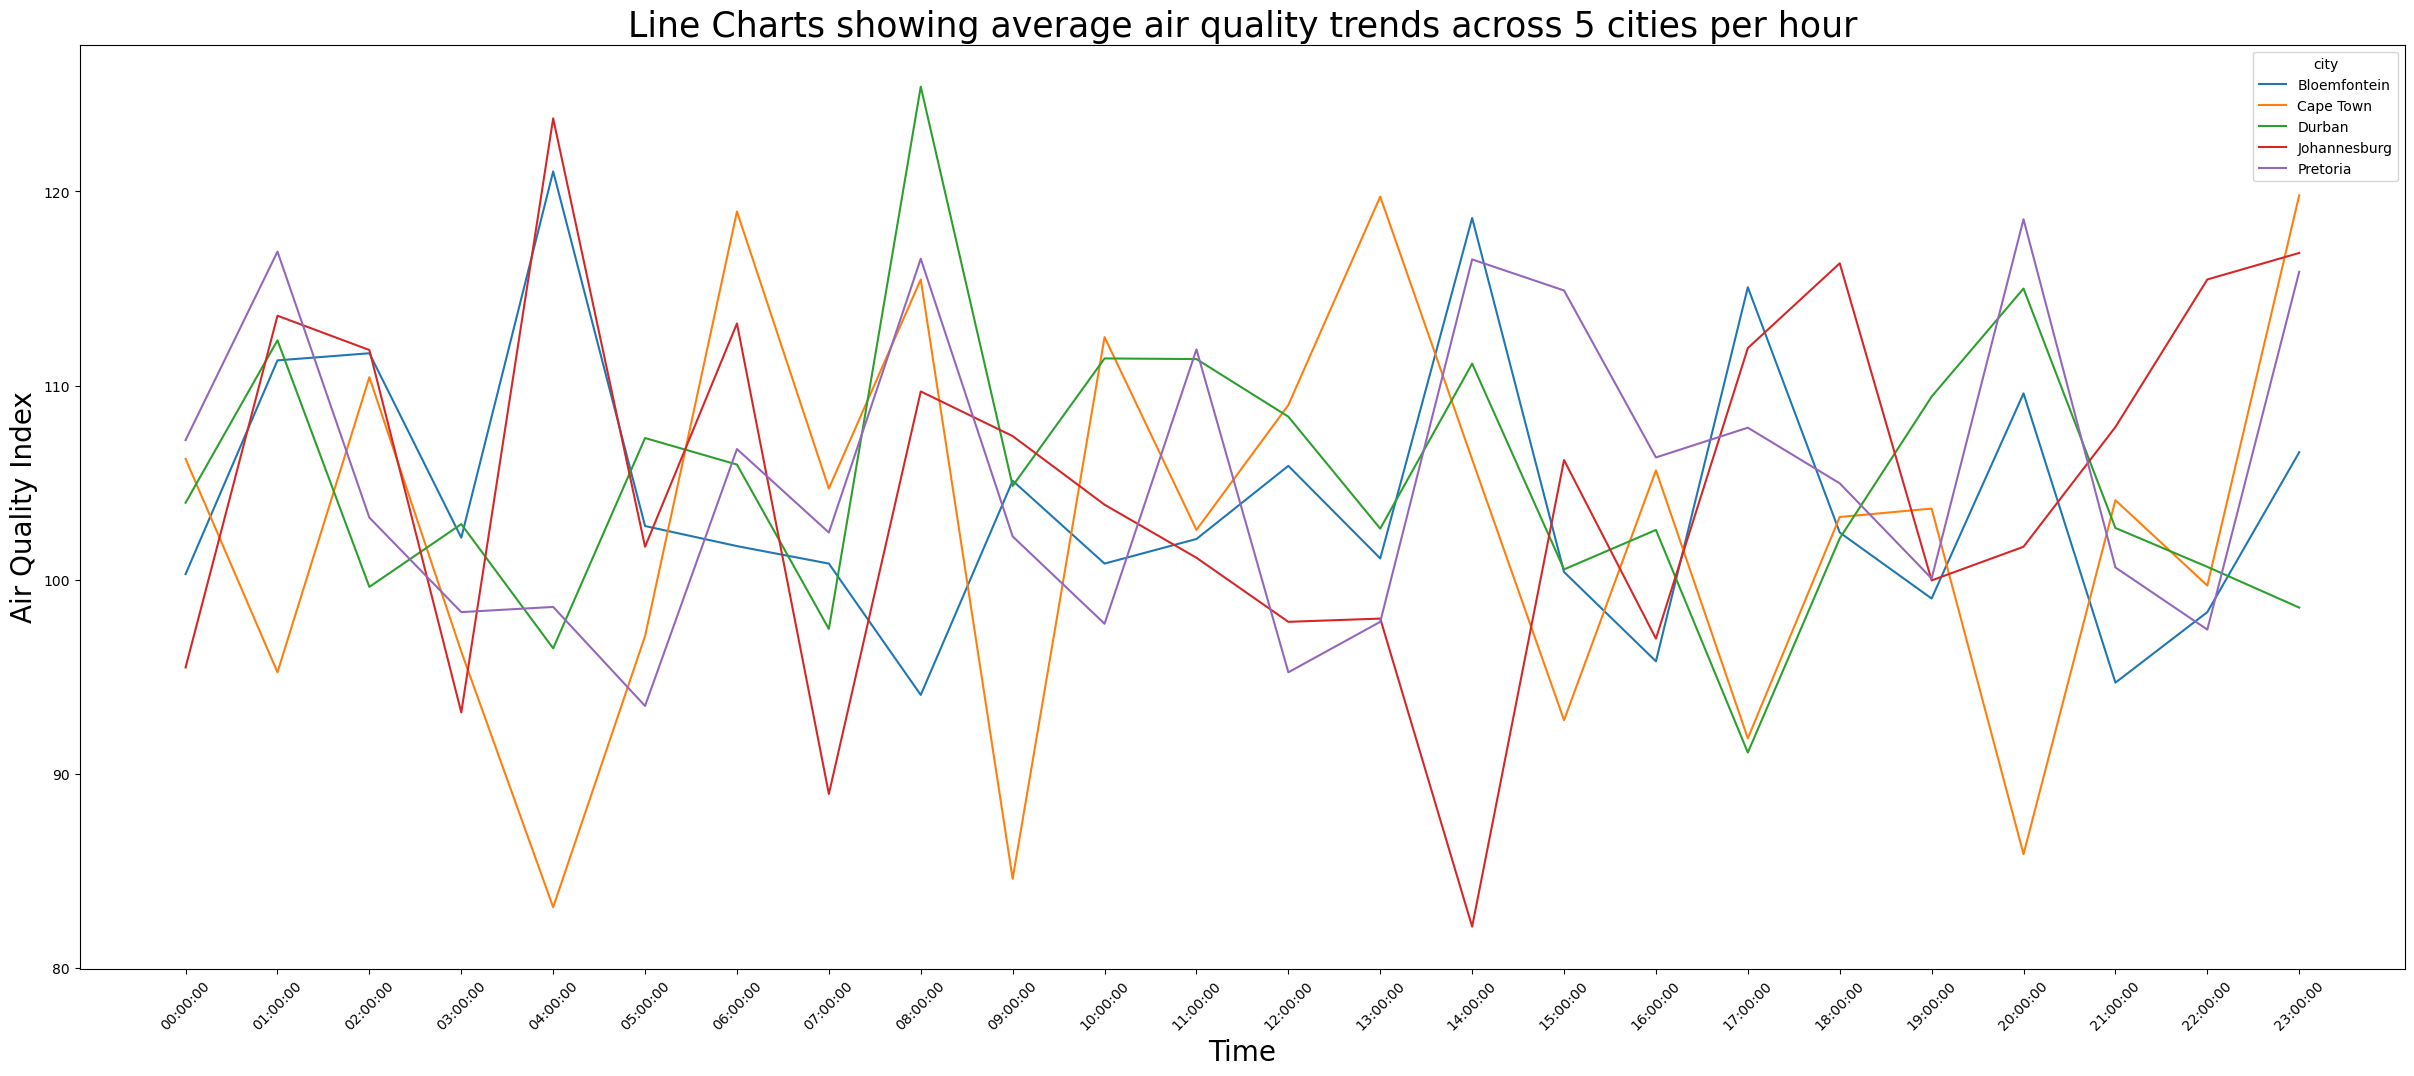

In [323]:
plt.figure(figsize= (30, 12))
sns.lineplot(x = 'time', y = 'air_quality_index', data = hourly_data, hue='city', color=['black', 'red', 'green', 'blue', 'grey'])
plt.title('Line Charts showing average air quality trends across 5 cities per hour', fontsize = 25)
plt.xticks(rotation = 45)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Air Quality Index', fontsize=20)
plt.show()

In [324]:
weather_data

,timestamp,city,temperature_C,humidity_%,air_quality_index,weather_condition,date,time
0,2023-01-01,Johannesburg,24.5,82,101,Sunny,2023-01-01,00:00:00
1,2023-01-01,Cape Town,21.3,60,132,Sunny,2023-01-01,00:00:00
2,2023-01-01,Durban,17.4,50,117,Rainy,2023-01-01,00:00:00
3,2023-01-01,Pretoria,21.4,75,133,Cloudy,2023-01-01,00:00:00
4,2023-01-01,Bloemfontein,19.1,60,87,Cloudy,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...
3600,2023-01-31,Johannesburg,13.6,60,142,Rainy,2023-01-31,00:00:00
3601,2023-01-31,Cape Town,19.5,79,126,Foggy,2023-01-31,00:00:00
3602,2023-01-31,Durban,25.2,74,45,Cloudy,2023-01-31,00:00:00
3603,2023-01-31,Pretoria,33.6,67,127,Cloudy,2023-01-31,00:00:00


In [325]:
bins = [51, 101, 151, 201,301]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']

# Create a new 'age_group' category column
weather_data['AQI Category'] = pd.cut(weather_data['air_quality_index'], bins=bins, labels=labels, right=False)

In [326]:
weather_data.head(5)

,timestamp,city,temperature_C,humidity_%,air_quality_index,weather_condition,date,time,AQI Category
0,2023-01-01,Johannesburg,24.5,82,101,Sunny,2023-01-01,00:00:00,Moderate
1,2023-01-01,Cape Town,21.3,60,132,Sunny,2023-01-01,00:00:00,Moderate
2,2023-01-01,Durban,17.4,50,117,Rainy,2023-01-01,00:00:00,Moderate
3,2023-01-01,Pretoria,21.4,75,133,Cloudy,2023-01-01,00:00:00,Moderate
4,2023-01-01,Bloemfontein,19.1,60,87,Cloudy,2023-01-01,00:00:00,Good


### 4. Write a Short Report:
Summarize your findings. Give simple advice like when it's safest to go outside based on air quality and weather.

#### Weather and Air Quality Report

##### Key Findings:

Cleanest Air: Bloemfontein had the cleanest air with an AQI of 30.

Most Polluted Air: Cape Town recorded the highest pollution levels, with an AQI of 179.

Weather Impact on AQI: Bad weather conditions like fog and storms do not show a direct correlation with high AQI. Air quality can be poor even in sunny weather, and vice-versa.

AQI Range: The air quality index in the observed cities ranged from 30 to 179, indicating varying levels of air quality.

Temperature Range: Temperatures varied between 7°C and 37.5°C.

Humidity Range: Humidity levels were between 40% and 89%.


#### Advice:
##### Best Time to Go Outside:

Generally, it's safest to go outside when the air quality index is low. An AQI below 100 is considered good.

Sunny weather is usually preferable for outdoor activities, but always check the AQI, as sunny conditions don't guarantee good air quality.

When to Limit Outdoor Activities:

Limit prolonged outdoor exertion when the AQI is above 100.

Individuals with respiratory issues, children, and the elderly should be more cautious and avoid strenuous activity when the AQI is high.

Avoid going outside during heavy fog or storms, not only because of the weather but also because these conditions can sometimes coincide with poor air quality.

Additional Considerations:

Temperature and humidity can also affect comfort levels. High temperatures and humidity can make it uncomfortable to be outdoors, even with good air quality.

Always check the local weather forecast and air quality index before planning outdoor activities, as conditions can change rapidly.